In [15]:

import numpy as np
import pandas as pd

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df,df1],ignore_index=True)

df = df.sample(40)
     

In [17]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


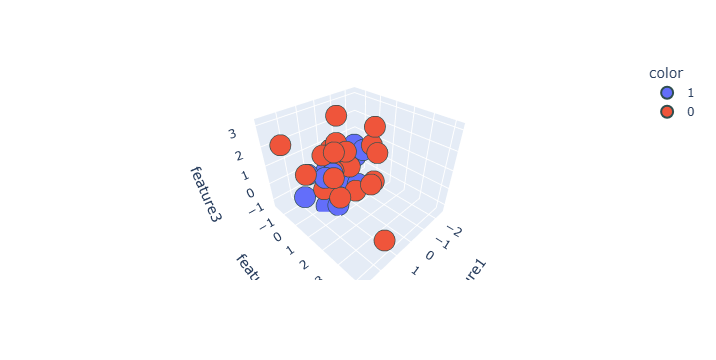

In [19]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()
     



In [21]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [27]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)
     

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [31]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [33]:
eigen_values


array([1.3536065 , 0.94557084, 0.77774573])

In [35]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

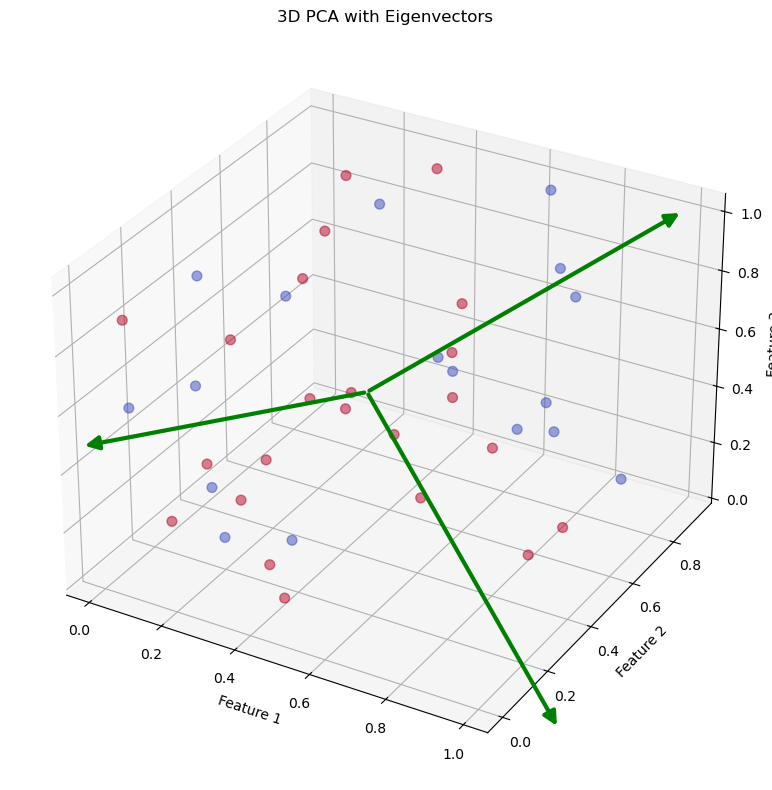

In [51]:
# Use modern magic command
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch

# ---- Fixed Arrow3D class ----
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.get_proj())
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        # Required by matplotlib to place the arrow in 3D space
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.get_proj())
        return np.min(zs)

# ----- Simulated Data (replace with your real df and eigen_vectors) -----
df = pd.DataFrame({
    'feature1': np.random.rand(40),
    'feature2': np.random.rand(40),
    'feature3': np.random.rand(40),
    'label': np.random.choice([0, 1], size=40)
})

X = df[['feature1', 'feature2', 'feature3']].values
X_centered = X - X.mean(axis=0)

# PCA using numpy
cov_matrix = np.cov(X_centered.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

# 2D transformation (first two PCs)
pc = eigen_vecs[:, :2]
transformed_df = np.dot(X_centered, pc)
new_df = pd.DataFrame(transformed_df, columns=['PC1', 'PC2'])
new_df['label'] = df['label']

# 3D plot of original features and eigenvectors
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['feature1'], df['feature2'], df['feature3'], c=df['label'], cmap='coolwarm', s=50, alpha=0.5)

mean_x, mean_y, mean_z = X.mean(axis=0)

# Draw eigenvectors
for vec in eigen_vecs.T:
    arrow = Arrow3D(
        [mean_x, mean_x + vec[0]],
        [mean_y, mean_y + vec[1]],
        [mean_z, mean_z + vec[2]],
        mutation_scale=20, lw=3, arrowstyle="-|>", color="green"
    )
    ax.add_artist(arrow)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title("3D PCA with Eigenvectors")
plt.tight_layout()
plt.show()


In [48]:


pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [60]:
transformed_df = np.dot(df.iloc[:, 0:3], pc)  # NOT pc.T
new_df = pd.DataFrame(transformed_df, columns=['PC1', 'PC2'])

# Replace 'label' with actual target column name
new_df['label'] = df['label'].values

new_df.head()


,PC1,PC2,label
0,0.442127,-0.339537,0
1,1.248725,0.211012,1
2,1.313627,-0.453557,0
3,1.067229,-0.069113,0
4,1.015419,-0.080381,1


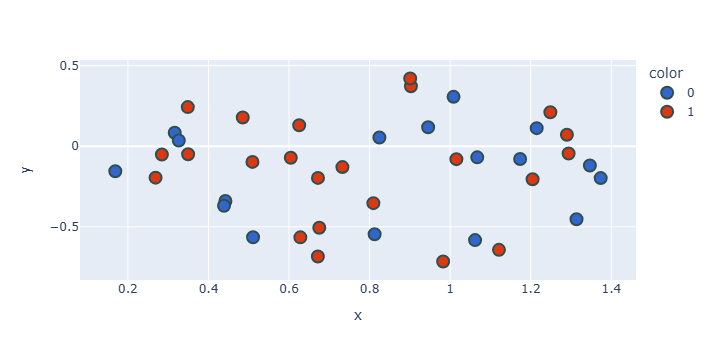

In [70]:


new_df['label'] = new_df['label'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['label'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()